<img src="https://www.ups.edu.ec/ups_portal-theme/images/ups/home/logo-ups-home.png"> 

### Project IA2
<text>Name :  Ruben Esteban Abad Ordoñez.</text>

<text>Subject: I.A.2</text>


### Libreries.

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


<text>In this Section right here, is where we fix and read the  dataset</text>

In [2]:
dirname = os.path.join(os.getcwd(), 'corpus')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            imag = plt.imread(filepath)
            imag = np.expand_dims(imag, axis=2)
            images.append(imag)
            
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_10_yna 1
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_11_taamatar 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_12_thaa 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_13_daa 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_14_dhaa 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_15_adna 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_16_tabala 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_17_tha 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_18_da 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_19_dha 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_1_ka 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_20_na 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_21_pa 1700
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_22_pha 1700
C:\User

<text>I am going to  obtain the labels, as these are the dataframe in x and y values.</text>

In [3]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

delta=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    delta.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint32) #turn into to list  numpy


# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
# print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print('tamanio de y',len(y))

Cantidad etiquetas creadas:  78200
0 character_10_yna
1 character_11_taamatar
2 character_12_thaa
3 character_13_daa
4 character_14_dhaa
5 character_15_adna
6 character_16_tabala
7 character_17_tha
8 character_18_da
9 character_19_dha
10 character_1_ka
11 character_20_na
12 character_21_pa
13 character_22_pha
14 character_23_ba
15 character_24_bha
16 character_25_ma
17 character_26_yaw
18 character_27_ra
19 character_28_la
20 character_29_waw
21 character_2_kha
22 character_30_motosaw
23 character_31_petchiryakha
24 character_32_patalosaw
25 character_33_ha
26 character_34_chhya
27 character_35_tra
28 character_36_gya
29 character_3_ga
30 character_4_gha
31 character_5_kna
32 character_6_cha
33 character_7_chha
34 character_8_ja
35 character_9_jha
36 digit_0
37 digit_1
38 digit_2
39 digit_3
40 digit_4
41 digit_5
42 digit_6
43 digit_7
44 digit_8
45 digit_9
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 3

<text>In this part we apply the hotencoding to the respective outputs to the y values and also divide or separate in the data for our train and test.
</text>

In [4]:
Y_one_hot = to_categorical(y)

In [5]:
#print(len(images),'---',len(Y_one_hot))
train_X,test_X,train_Y,test_Y = train_test_split(X,Y_one_hot,test_size=0.2)
print(len(train_X))
print(len(test_X))

62560
15640


<text>Now we proceed to the design of the neural network which consists of a hidden netra layer 3 and an y-output  repectively will deal with alpha and an acceptable error for its use and increase the precision.
</text>

In [8]:
INIT_LR = 2e-2
epochs = 25
batch_size = 128
modelo = Sequential()
modelo.add(Dense(32, activation='relu',input_shape=(32,32,1)))
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(64, activation='relu'))
# modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(32,32,1)))
modelo.add(LeakyReLU(alpha=0.4))
modelo.add(MaxPooling2D((2, 2),padding='same'))
modelo.add(Dropout(0.2))
 
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
# modelo.add(Dense(32, activation='linear'))
modelo.add(LeakyReLU(alpha=0.4))
modelo.add(Dropout(0.2)) 
modelo.add(Dense(nClasses, activation='softmax'))
modelo.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# modelo.summary()
# modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

<text>This section includes training and its structure.</text>

<text>In this part is the training which took 45 min with 25 Epochs*
</text>

In [9]:
sport_train_dropout = modelo.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_X, test_Y))

Train on 62560 samples, validate on 15640 samples
Epoch 1/25
62560/62560 [==============================] - 105s 2ms/step - loss: 1.7102 - accuracy: 0.5342 - val_loss: 1.1423 - val_accuracy: 0.6835
Epoch 2/25
62560/62560 [==============================] - 105s 2ms/step - loss: 1.1756 - accuracy: 0.6668 - val_loss: 0.9832 - val_accuracy: 0.7295
Epoch 3/25
62560/62560 [==============================] - 105s 2ms/step - loss: 1.0426 - accuracy: 0.7011 - val_loss: 0.8989 - val_accuracy: 0.7472
Epoch 4/25
62560/62560 [==============================] - 105s 2ms/step - loss: 0.9671 - accuracy: 0.7226 - val_loss: 0.8463 - val_accuracy: 0.7609
Epoch 5/25
62560/62560 [==============================] - 106s 2ms/step - loss: 0.9138 - accuracy: 0.7363 - val_loss: 0.8262 - val_accuracy: 0.7673
Epoch 6/25
62560/62560 [==============================] - 105s 2ms/step - loss: 0.8683 - accuracy: 0.7496 - val_loss: 0.7964 - val_accuracy: 0.7753
Epoch 7/25
62560/62560 [==============================] - 106s

<text> In this part  is   to estimate a  % Precision</text>

In [10]:
from sklearn.metrics import accuracy_score
y_pred = modelo.predict(test_X)

pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
test = list()
for i in range(len(test_Y)):
    test.append(np.argmax(test_Y[i]))
    
    
precision = accuracy_score(pred, test) # Comparamos lo que predijo la red con las salidas deseadas
valPorc=precision*100
print('Precisión: ',valPorc)

Precisión:  80.84398976982096


### In this part is to draw   about to train and test

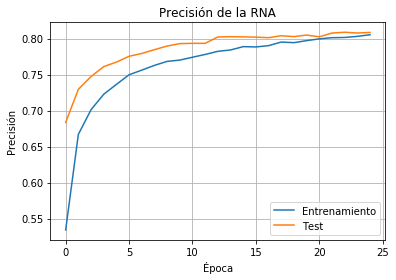

In [11]:
import matplotlib.pyplot as pp

%matplotlib inline

#print(historial.history)

pp.plot(sport_train_dropout.history['accuracy'])
pp.plot(sport_train_dropout.history['val_accuracy'])
pp.title('Precisión de la RNA')
pp.ylabel('Precisión')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='lower right')
pp.grid(True)
pp.show()

### In this part is to draw   about to loss witnh respective to Epoch

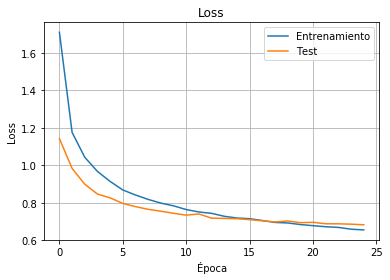

In [13]:
pp.plot(sport_train_dropout.history['loss'])
pp.plot(sport_train_dropout.history['val_loss'])
pp.title('Loss')
pp.ylabel('Loss')
pp.xlabel('Época')
pp.legend(['Entrenamiento','Test'], loc='upper right')
pp.grid(True)
pp.show()

### In this part  is  to save    the model .

In [129]:
modelo.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### In this part is doing to Prediction with Image

In [15]:
import tensorflow as tf
from PIL import Image
dirnam = os.path.join(os.getcwd(),)
print(dirnam)
image = Image.open("1380.png")

C:\Users\Ruben\OneDrive\UPS\10mo\IA2


In [16]:
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = modelo.predict(input_arr)
print(len(predictions))

1


In [17]:
print("Imágen:{}".format(predictions))

Imágen:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Finally the prediction procedure goes with which it is established as a parameter to the image itself for its prediction and launches its respective output.

In [31]:
import matplotlib.pyplot as p
valPorc
lista=[]
lista2=[]
azure
for k in range(46):
    lista.append(0)
    name2 = directories[k].split(os.sep)
    lista2.append(name2[len(name2)-1])
    print(lista2[k])
    

for i in range(len(predictions)):
    for j in range (len(predictions[i])):
        if(predictions[i][j]!=0):
            print((predictions[i][j]))
            print(j)
            print(directories[j])
            lista[j]=valPorc
            name = directories[j].split(os.sep)
            print(name[len(name)-1])
            break
p.bar()

character_10_yna
character_11_taamatar
character_12_thaa
character_13_daa
character_14_dhaa
character_15_adna
character_16_tabala
character_17_tha
character_18_da
character_19_dha
character_1_ka
character_20_na
character_21_pa
character_22_pha
character_23_ba
character_24_bha
character_25_ma
character_26_yaw
character_27_ra
character_28_la
character_29_waw
character_2_kha
character_30_motosaw
character_31_petchiryakha
character_32_patalosaw
character_33_ha
character_34_chhya
character_35_tra
character_36_gya
character_3_ga
character_4_gha
character_5_kna
character_6_cha
character_7_chha
character_8_ja
character_9_jha
digit_0
digit_1
digit_2
digit_3
digit_4
digit_5
digit_6
digit_7
digit_8
digit_9
1.0
10
C:\Users\Ruben\OneDrive\UPS\10mo\IA2\corpus\character_1_ka
character_1_ka


### Histograma

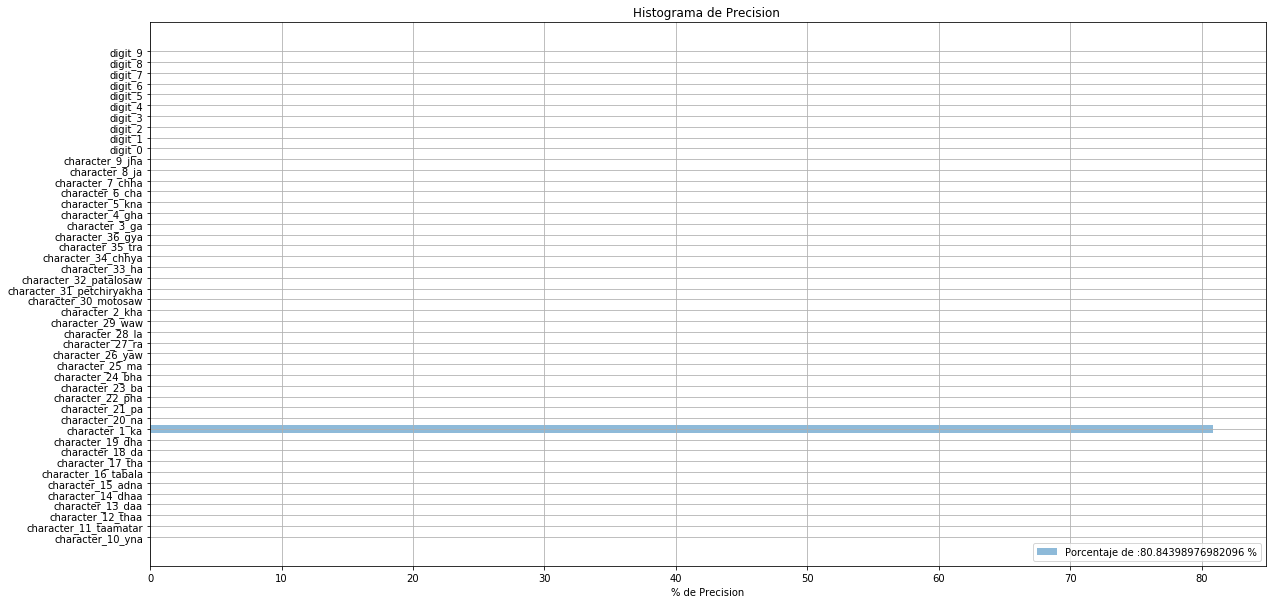

In [128]:
v= 'Porcentaje de :'+str(valPorc)+' %'
y_pos = np.arange(len(lista2))
#Creamos la grafica pasando los valores en el eje X, Y, donde X = cantidad_usos y Y = lenguajes
plt.figure(figsize=(20,10))
plt.barh(y_pos, lista, align='center', alpha=0.5)
#Añadimos la etiqueta de nombre de cada lenguaje en su posicion correcta
plt.yticks(y_pos, lista2)
#añadimos una etiqueta en el eje X
plt.xlabel('% de Precision')
#Y una etiqueta superior
plt.title('Histograma de Precision ')
plt.savefig('barras_horizontal.png',dpi = 300)
pp.legend([v], loc='lower right')
pp.grid(True)
plt.show()